### _V46_ $ $ Der Faraday-Effekt

#### Vorläufige Auswertung

In [1]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import uncertainties.unumpy as unp
from uncertainties.unumpy import nominal_values as noms, std_devs as stds, uarray as uar

def degmin(ang : np.ndarray):
    return ang.astype(int) + (ang - ang.astype(int)) / 0.6

def rad(ang : np.ndarray):
    return ang * np.pi / 180

##### B(z)

[0.1 0.2 0.3]
[0.001 0.002 0.003]


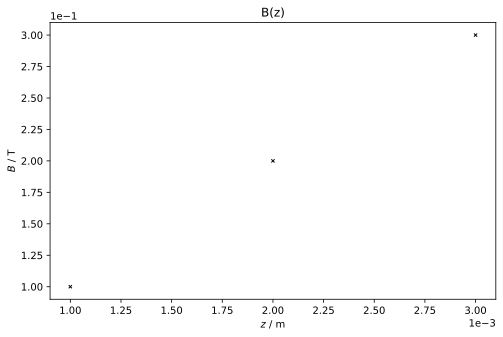

In [7]:
B, z = np.genfromtxt('data/field.txt', unpack=True)
B, z = B * 1e-3, z * 1e-3

print(B)
print(z)

plt.figure(figsize=(8,5))

plt.plot(z, B, 'kx', ms=3.21)

plt.title('B(z)')
plt.xlabel(r'$z$ / m')
plt.ylabel(r'$B$ / T')

plt.gca().ticklabel_format(scilimits=(0,0))

plt.show()
plt.close()

##### n-GaAs (1)

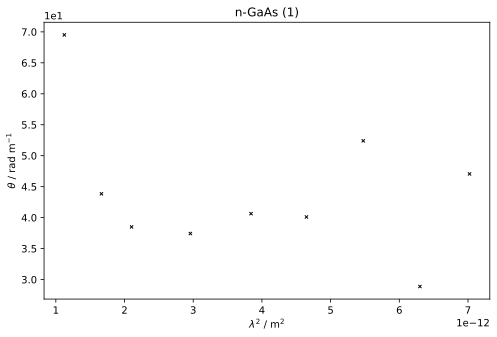

In [18]:
L = 1.36e-3

l, th1, th2 = np.genfromtxt('data/doped-1.txt', unpack=True)
th1, th2 = degmin(th1), degmin(th2)

l = l * 1e-6
theta_1 = rad((th1 - th2) / 2) / L

plt.figure(figsize=(8,5))

plt.plot(l**2, theta_1, 'kx', ms=3.21)

plt.title('n-GaAs (1)')
plt.xlabel(r'$\lambda^2$ / m$^2$')
plt.ylabel(r'$\theta$ / rad m$^{-1}$')

plt.gca().ticklabel_format(scilimits=(0,0))

plt.show()
plt.close()

##### n-GaAs (2)

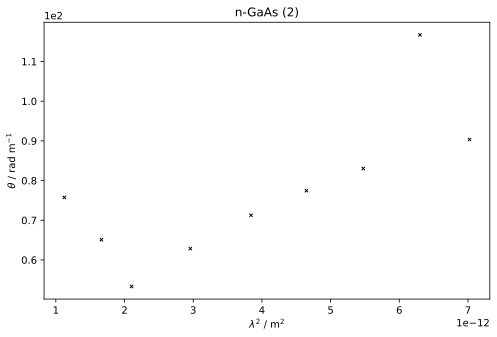

In [21]:
L = 1.296e-3

l, th1, th2 = np.genfromtxt('data/doped-2.txt', unpack=True)
th1, th2 = degmin(th1), degmin(th2)

l = l * 1e-6
theta_2 = rad((th1 - th2) / 2) / L

plt.figure(figsize=(8,5))

plt.plot(l**2, theta_2, 'kx', ms=3.21)

plt.title('n-GaAs (2)')
plt.xlabel(r'$\lambda^2$ / m$^2$')
plt.ylabel(r'$\theta$ / rad m$^{-1}$')

plt.gca().ticklabel_format(scilimits=(0,0))

plt.show()
plt.close()

##### GaAs

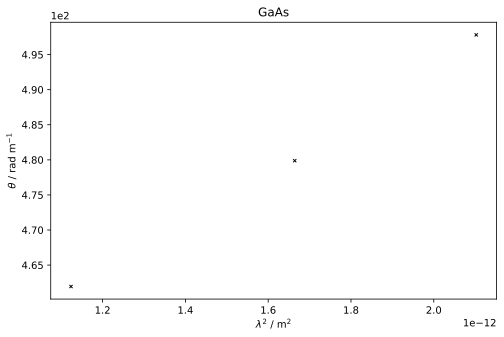

In [20]:
L = 5.11e-3

l, th1, th2 = np.genfromtxt('data/pure.txt', unpack=True)
th1, th2 = degmin(th1), degmin(th2)

l = l * 1e-6
theta = rad((th1 - th2) / 2) / L

plt.figure(figsize=(8,5))

plt.plot(l**2, theta, 'kx', ms=3.21)

plt.title('GaAs')
plt.xlabel(r'$\lambda^2$ / m$^2$')
plt.ylabel(r'$\theta$ / rad m$^{-1}$')

plt.gca().ticklabel_format(scilimits=(0,0))

plt.show()
plt.close()

##### Theta

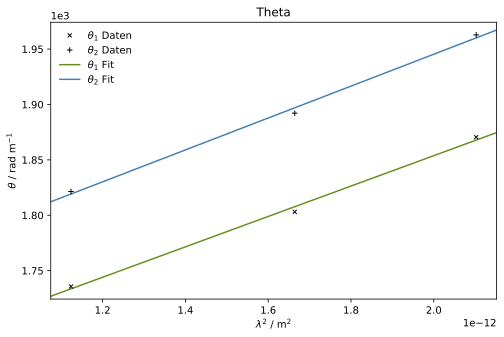

Fit:

(1)   a = 1.37e+14   b = 1.58e+03
(2)   a = 1.44e+14   b = 1.66e+03


Literatur:

      me = 9.1e-31 kg

      m* = 6.1e-32 kg = 0.067 me

Ergebnis:

(1)   m* = 1.3e-32 kg = 0.014 me
(2)   m* = 1.9e-32 kg = 0.021 me


In [6]:
thetadiff_1 = np.abs(theta - theta_1)
thetadiff_2 = np.abs(theta - theta_2)

b = np.max(B)
n = 3.4

N_1 = 1.2e24
N_2 = 2.8e24

e = const.e
c = const.c
eps = const.epsilon_0

K = e**3 / (8 * np.pi**2 * eps * c**3)

a_1, b_1 = np.polyfit(l**2, theta_1, deg=1)
a_2, b_2 = np.polyfit(l**2, theta_2, deg=1)

ll = np.array([-1, 1])

plt.figure(figsize=(8,5))

plt.plot(l**2, theta_1, 'kx', ms=4, zorder=10, label=r'$\theta_1$ Daten')
plt.plot(l**2, theta_2, 'k+', ms=5.5, zorder=10, label=r'$\theta_2$ Daten')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot(ll, a_1 * ll + b_1, c='olivedrab', zorder=0, label=r'$\theta_1$ Fit')
plt.plot(ll, a_2 * ll + b_2, c='steelblue', zorder=0, label=r'$\theta_2$ Fit')

plt.title('Theta')
plt.xlabel(r'$\lambda^2$ / m$^2$')
plt.ylabel(r'$\theta$ / rad m$^{-1}$')

plt.legend(frameon=False)

plt.gca().ticklabel_format(scilimits=(0,0))

plt.show()
plt.close()

me = const.electron_mass
m = 0.067 * me

m1 = np.sqrt((K * N_1 * b / n) / a_1)
m2 = np.sqrt((K * N_2 * b / n) / a_2)

print('Fit:')
print()
print(f'(1)   a = {a_1:.3}   b = {b_1:.3}')
print(f'(2)   a = {a_2:.3}   b = {b_2:.3}')
print()
print()
print('Literatur:')
print()
print(f'      me = {me:.2} kg')
print()
print(f'      m* = {m:.2} kg = {m / me:.3f} me')
print()
print('Ergebnis:')
print()
print(f'(1)   m* = {m1:.2} kg = {m1 / me:.3f} me')
print(f'(2)   m* = {m2:.2} kg = {m2 / me:.3f} me')